# **Import Library:** 분석에 사용할 모듈 설치

[![Open in Colab](http://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/thekimk/All-About-Deep-Learning/blob/main/Practice4-3_DeepLearning_CNNArchitectures_KK.ipynb)

In [1]:
# !pip install --upgrade pip
# !python -m pip install --user --upgrade pip

In [2]:
# # Tensorflow 및 Keras 설치하기
# !pip install tensorflow==2.10.*
# # !pip install --upgrade --user tensorflow
# !pip install -U tensorflow-addons
# !pip install keras
# # !pip install --upgrade --user keras
# !pip install keras-tqdm

In [3]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
tf.get_logger().warning('test')
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Dropout, Reshape
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.utils import plot_model

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV

# Evaluation metrics
from sklearn import metrics
# for regression
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error
# for classification
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [4]:
# 사용자 정의 함수
from module_regression import *
from module_classification import *

# **Problem:** 숫자이미지 분류

## Data Preprocessing

In [5]:
# MNIST(Modified National Institute of Standards and Technology)를 Train, Test로 로딩
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [6]:
# 데이터의 갯수와 크기 확인
print('---------------train----------------')
print('X: ', X_train.shape, X_train.min(), X_train.max())
print('Y: ', Y_train.shape)
print('----------------test----------------')
print('X: ', X_test.shape, X_test.min(), X_test.max())
print('Y: ', Y_test.shape)

---------------train----------------
X:  (60000, 28, 28) 0 255
Y:  (60000,)
----------------test----------------
X:  (10000, 28, 28) 0 255
Y:  (10000,)


In [7]:
# 샘플 데이터 출력
# 0에서 255 사이의 값을 가진 데이터
for i in range(X_train[0].shape[0]):
    for j in range(X_train[0].shape[1]):
        print('{:4d}'.format(X_train[0][i][j]), end='')
    print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

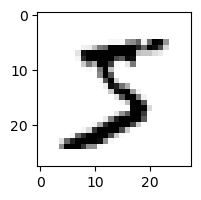

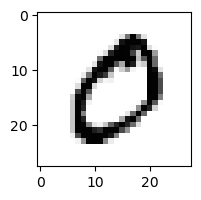

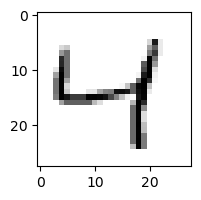

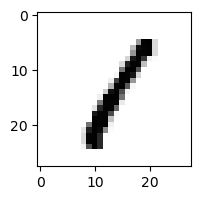

Label of train:  [5 0 4 1]


In [8]:
# 샘플 데이터 시각화
# 0에서 255 사이의 값을 가진 데이터 시각화
for i in range(4):
    plt.figure(figsize=(2,2))
    plt.imshow(X_train[i], cmap='Greys')
    plt.show()

print('Label of train: ', Y_train[:4])

In [9]:
# 데이터 스케일링
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0


In [10]:
# Reshape
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

X_train: (60000, 784) Y_train: (60000,)
X_test: (10000, 784) Y_test: (10000,)


## MLP

<center><img src='Image/Expert/DL_MLP_Custom.PNG' width='500'></center>

In [11]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
LOSS = 'sparse_categorical_crossentropy'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 5
VERBOSE = 1

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


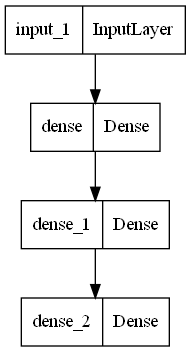

In [12]:
# 네트워크 구축
inputs = Input(shape=(X_train.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION)(inputs)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

Epoch 1/5
750/750 [==============================] - 9s 7ms/step - loss: 0.2539 - accuracy: 0.9238 - val_loss: 0.1834 - val_accuracy: 0.9467
Epoch 2/5
750/750 [==============================] - 5s 7ms/step - loss: 0.1565 - accuracy: 0.9549 - val_loss: 0.1606 - val_accuracy: 0.9588
Epoch 3/5
750/750 [==============================] - 4s 5ms/step - loss: 0.1333 - accuracy: 0.9628 - val_loss: 0.1626 - val_accuracy: 0.9570
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.1156 - accuracy: 0.9682 - val_loss: 0.1498 - val_accuracy: 0.9610
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.1085 - accuracy: 0.9709 - val_loss: 0.1497 - val_accuracy: 0.9653


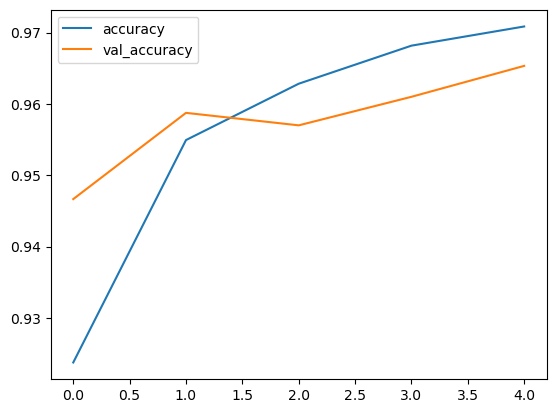

In [13]:
# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

### Prediction and Evaluation

In [14]:
# Train 데이터 예측하기
Y_trpred = model.predict(X_train)
print(Y_trpred, '\n\n', np.argmax(Y_trpred, axis=1))

1875/1875 [==============================] - 3s 2ms/step
[[1.0537632e-10 2.2789631e-10 2.3074535e-11 ... 6.0459406e-09
  3.7465689e-10 2.6889358e-05]
 [1.0000000e+00 7.3398673e-22 1.0234251e-12 ... 1.2552221e-18
  7.0338429e-15 2.5422202e-13]
 [8.1893853e-07 4.4215575e-08 3.6048045e-06 ... 2.7773103e-05
  3.6566149e-07 2.1960521e-04]
 ...
 [3.0187534e-21 1.1393785e-20 1.2718094e-22 ... 1.5178971e-19
  5.9717284e-16 2.0869131e-10]
 [4.0980044e-14 1.2291536e-22 9.4264365e-09 ... 8.6037209e-23
  2.3978085e-12 3.0284625e-15]
 [2.3473574e-07 3.1082681e-08 1.5255308e-08 ... 5.8003678e-08
  9.9999845e-01 9.5440248e-07]] 

 [5 0 4 ... 5 6 8]


In [15]:
# Test 데이터 예측하기
Y_tepred = model.predict(X_test)
print(Y_tepred, '\n\n', np.argmax(Y_tepred, axis=1))

313/313 [==============================] - 1s 2ms/step
[[8.66782701e-10 4.59381141e-07 8.63000576e-04 ... 9.98135448e-01
  1.26585476e-07 7.41875439e-04]
 [9.44805012e-10 2.00494227e-07 9.99998212e-01 ... 1.56373426e-06
  7.70954234e-09 4.92164781e-11]
 [9.00591548e-19 1.00000000e+00 2.53998562e-17 ... 1.63358807e-17
  2.74725836e-14 6.35946103e-14]
 ...
 [3.76242455e-19 7.90397749e-14 2.33369555e-17 ... 1.25164148e-13
  3.73288710e-20 2.05348605e-09]
 [4.31720056e-25 6.47849261e-31 3.38352090e-32 ... 1.01120115e-30
  1.63866306e-16 3.41700387e-29]
 [4.42441569e-11 1.37319600e-17 6.52245888e-07 ... 1.05137577e-19
  4.80924500e-09 9.56704225e-13]] 

 [7 2 1 ... 4 5 6]


In [16]:
# Train 예측 성능 평가하기
# 학습과정의 결과와 유사
model.evaluate(X_train, Y_train)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0912 - accuracy: 0.9753


[0.09122373163700104, 0.9752833247184753]

In [17]:
# Train 예측 성능 평가하기
# 학습과정의 결과와 유사
pd.crosstab(Y_train, np.argmax(model.predict(X_train), axis=1),
            rownames=['True'], colnames=['Pred'])

1875/1875 [==============================] - 3s 2ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,5815,1,36,0,6,1,22,0,38,4
1,0,6670,16,7,3,1,3,5,36,1
2,3,7,5915,3,1,0,2,3,23,1
3,2,3,165,5714,1,137,0,9,77,23
4,0,15,24,1,5744,0,5,4,10,39
5,5,0,14,31,6,5205,71,3,75,11
6,5,2,16,0,11,2,5864,0,17,1
7,5,21,102,5,9,3,0,6047,9,64
8,7,10,30,5,7,12,11,0,5761,8


In [18]:
# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1410 - accuracy: 0.9646


[0.1409788727760315, 0.9646000266075134]

In [19]:
# Test 예측 성능 평가하기
pd.crosstab(Y_test, np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

313/313 [==============================] - 0s 1ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,963,2,4,0,2,1,4,1,3,0
1,0,1120,3,1,0,0,4,0,7,0
2,2,0,1023,1,1,0,0,2,3,0
3,1,0,25,927,0,34,0,3,11,9
4,0,2,9,0,948,0,4,0,3,16
5,4,1,1,7,3,844,13,1,15,3
6,3,2,3,0,4,2,938,0,6,0
7,1,7,30,2,0,1,0,974,1,12
8,2,0,9,5,4,1,6,2,944,1


In [20]:
# 임의 데이터를 예측하고 정답과 비교하기
idx_rand = np.random.randint(0, X_train.shape[0])
print('목표값: ', Y_train[idx_rand])
print('예측값: ', np.argmax(model.predict(X_train[idx_rand][np.newaxis,:])))

목표값:  1
1/1 [==============================] - 0s 18ms/step
예측값:  1


### Summary

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0
X_train: (60000, 784) Y_train: (60000,)
X_test: (10000, 784) Y_test: (10000,)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
750/750 [==========

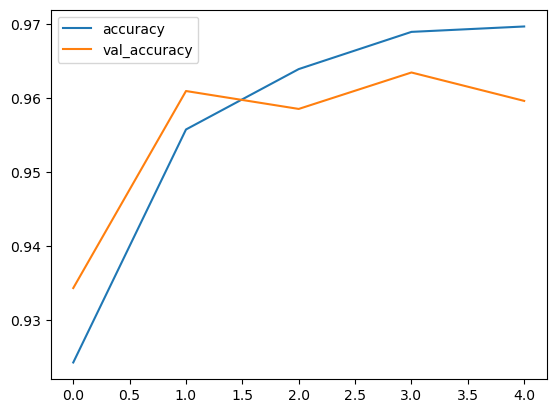

313/313 [==============================] - 1s 2ms/step - loss: 0.1558 - accuracy: 0.9611

Test Confusion Maxtrix: 
313/313 [==============================] - 0s 1ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,969,0,4,0,0,3,2,1,1,0
1,0,1094,10,2,0,2,1,2,21,3
2,1,0,1021,0,1,0,0,7,2,0
3,1,0,22,926,0,37,0,8,5,11
4,2,1,2,0,942,0,3,5,5,22
5,2,0,2,1,1,870,4,1,7,4
6,7,3,2,0,14,7,922,0,3,0
7,0,1,11,2,1,1,0,991,4,17
8,10,0,24,4,3,14,2,4,904,9


In [21]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
LOSS = 'sparse_categorical_crossentropy'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 5
VERBOSE = 1

# Train, Test로 로딩
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION)(inputs)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(Y_test, np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

## CNN

<center><img src='Image/Expert/CNN_Example.webp' width='900'></center>

### Convolution and Pooling

<center><img src='Image/Expert/CNN_Process_BlackImage.PNG' width='800'>(https://all-young.tistory.com/43)</center>

- **Convolution**

In [22]:
# 임의 데이터 생성
X = tf.random.normal(shape=(128,28,28,1), mean=0., stddev=1.) # [batch size, W, H, channel]
X.shape

TensorShape([128, 28, 28, 1])

In [23]:
# 합성곱을 통과한 데이터
hiddens = Conv2D(filters=32, kernel_size=(3,3), activation="relu")(X)
print('After Convolution: ', hiddens.shape)

After Convolution:  (128, 26, 26, 32)


In [24]:
# STRIDE 이동을 빠르게 할 경우의 데이터
hiddens = Conv2D(filters=32, kernel_size=(3,3), strides=2, activation="relu")(X)
print('After Convolution: ', hiddens.shape)

After Convolution:  (128, 13, 13, 32)


In [25]:
# 입력과 출력의 크기가 같은 데이터
hiddens = Conv2D(filters=32, kernel_size=(3,3), strides=2, padding='same', activation="relu")(X)
print('After Convolution: ', hiddens.shape)

After Convolution:  (128, 14, 14, 32)


- **Pooling**

In [26]:
# 임의 데이터 생성
X = tf.random.normal(shape=(128,28,28,1), mean=0., stddev=1.) # [batch size, W, H, channel]
hiddens = Conv2D(filters=32, kernel_size=(3,3), strides=2, padding='same', activation="relu")(X)
print('After Convolution: ', hiddens.shape)

After Convolution:  (128, 14, 14, 32)


In [27]:
# Max Pooling 이후의 데이터
hiddens_pool = MaxPooling2D(pool_size=(2,2), strides=(2,2))(hiddens)
print('After Pooling: ', hiddens_pool.shape)

After Pooling:  (128, 7, 7, 32)


In [28]:
# Max Pooling 이후의 데이터
hiddens_pool = MaxPooling2D(pool_size=(4,4), strides=(4,4))(hiddens)
print('After Pooling: ', hiddens_pool.shape)

After Pooling:  (128, 3, 3, 32)


In [29]:
# Max Pooling 이후의 데이터
hiddens_pool = MaxPooling2D(pool_size=(4,4), strides=(4,4), padding='same')(hiddens)
print('After Pooling: ', hiddens_pool.shape)

After Pooling:  (128, 4, 4, 32)


### Summary

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0
X_train: (60000, 28, 28, 1) Y_train: (60000,)
X_test: (10000, 28, 28, 1) Y_test: (10000,)
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 10)                250890    
                       

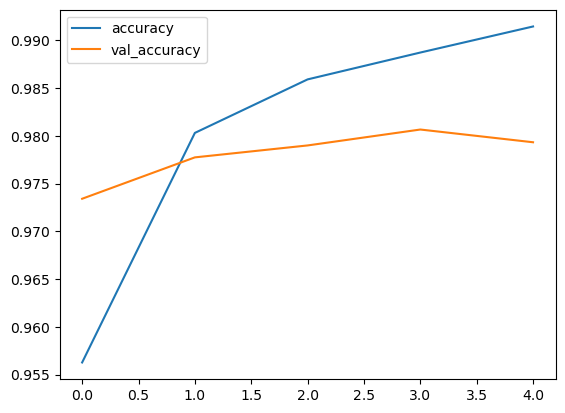

313/313 [==============================] - 1s 3ms/step - loss: 0.0771 - accuracy: 0.9823

Test Confusion Maxtrix: 
313/313 [==============================] - 1s 2ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,975,0,1,0,0,0,2,1,1,0
1,0,1125,4,1,1,1,1,1,1,0
2,4,2,1016,1,2,0,1,4,2,0
3,0,0,8,993,0,6,0,1,2,0
4,1,0,2,0,965,0,4,2,1,7
5,2,1,1,5,0,871,4,0,3,5
6,11,1,1,0,1,2,941,0,1,0
7,0,3,11,0,1,0,0,1002,6,5
8,3,0,2,1,0,2,5,2,955,4


In [30]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
LOSS = 'sparse_categorical_crossentropy'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 5
VERBOSE = 1

# Train, Test로 로딩
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(-1, X_test.shape[1], X_train.shape[2], 1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))   
hiddens = Conv2D(128, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(inputs)
hiddens = MaxPooling2D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Flatten()(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(Y_test, np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

## CNN with Tuning

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0
X_train: (60000, 28, 28, 1) Y_train: (60000,)
X_test: (10000, 28, 28, 1) Y_test: (10000,)
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        73792     
                       

Training:   0%|                                                                                 0/5 ETA: ?s,  …

Epoch 1/5
750/750 [==============================] - 5s 6ms/step - loss: 0.2854 - accuracy: 0.9110 - val_loss: 0.0852 - val_accuracy: 0.9756
Epoch 2/5
750/750 [==============================] - 4s 6ms/step - loss: 0.1802 - accuracy: 0.9463 - val_loss: 0.0678 - val_accuracy: 0.9818
Epoch 3/5
750/750 [==============================] - 4s 6ms/step - loss: 0.1704 - accuracy: 0.9499 - val_loss: 0.0589 - val_accuracy: 0.9838
Epoch 4/5
750/750 [==============================] - 5s 7ms/step - loss: 0.1609 - accuracy: 0.9531 - val_loss: 0.0651 - val_accuracy: 0.9825
Epoch 5/5
750/750 [==============================] - 6s 7ms/step - loss: 0.1633 - accuracy: 0.9525 - val_loss: 0.0574 - val_accuracy: 0.9836


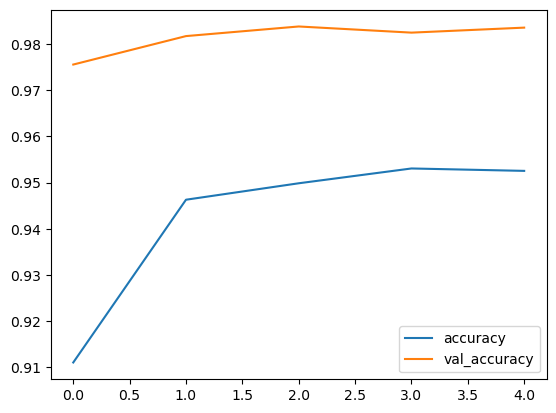

313/313 [==============================] - 1s 4ms/step - loss: 0.0547 - accuracy: 0.9822

Test Confusion Maxtrix: 
313/313 [==============================] - 1s 3ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,971,0,1,0,0,0,5,1,2,0
1,0,1129,1,2,0,0,0,0,3,0
2,3,2,1024,1,0,0,0,2,0,0
3,0,0,2,987,0,15,0,2,4,0
4,0,1,1,0,963,0,2,1,2,12
5,1,0,0,1,0,889,1,0,0,0
6,2,2,0,0,4,3,943,0,4,0
7,0,9,12,2,0,1,0,995,1,8
8,3,2,4,1,3,4,0,2,952,3


In [31]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'sparse_categorical_crossentropy'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 5
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','Number_MNIST_CNN.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(-1, X_test.shape[1], X_train.shape[2], 1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))   
hiddens = Conv2D(128, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(inputs)
hiddens = MaxPooling2D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Conv2D(64, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(hiddens)
hiddens = MaxPooling2D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Flatten()(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION)(hiddens)  
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(Y_test, np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

In [32]:
# 베스트 모델 로딩
model = load_model(FILENAME)

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(Y_test, np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

313/313 [==============================] - 1s 3ms/step - loss: 0.0547 - accuracy: 0.9822

Test Confusion Maxtrix: 
313/313 [==============================] - 1s 2ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,971,0,1,0,0,0,5,1,2,0
1,0,1129,1,2,0,0,0,0,3,0
2,3,2,1024,1,0,0,0,2,0,0
3,0,0,2,987,0,15,0,2,4,0
4,0,1,1,0,963,0,2,1,2,12
5,1,0,0,1,0,889,1,0,0,0
6,2,2,0,0,4,3,943,0,4,0
7,0,9,12,2,0,1,0,995,1,8
8,3,2,4,1,3,4,0,2,952,3


목표값: 


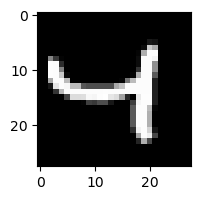

1/1 [==============================] - 0s 75ms/step
예측값:  4


In [33]:
# 임의 데이터를 예측하고 정답과 비교하기
idx_rand = np.random.randint(0, X_test.shape[0])
print('목표값: ')
plt.figure(figsize=(2,2))
plt.imshow(X_test[idx_rand], cmap='gray')
plt.show()
print('예측값: ', np.argmax(model.predict(X_test[idx_rand][np.newaxis,:])))

# **Problem:** 패션이미지 분류

## Data Preprocessing

In [34]:
# Train, Test 로딩
mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [35]:
# 데이터의 갯수와 크기 확인
print('---------------train----------------')
print('X: ', X_train.shape, X_train.min(), X_train.max())
print('Y: ', Y_train.shape)
print('----------------test----------------')
print('X: ', X_test.shape, X_test.min(), X_test.max())
print('Y: ', Y_test.shape)

---------------train----------------
X:  (60000, 28, 28) 0 255
Y:  (60000,)
----------------test----------------
X:  (10000, 28, 28) 0 255
Y:  (10000,)


In [36]:
# 샘플 데이터 출력
# 0에서 255 사이의 값을 가진 데이터
for i in range(X_train[0].shape[0]):
    for j in range(X_train[0].shape[1]):
        print('{:4d}'.format(X_train[0][i][j]), end='')
    print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0
   0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3
   0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15
   0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66
   0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 223 215 213 164 127

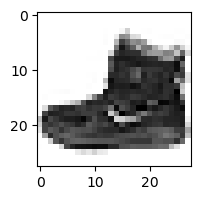

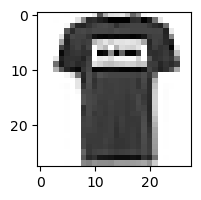

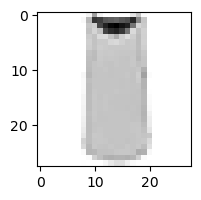

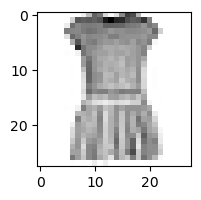

Label of train:  ['Ankle Boot', 'T-shirt', 'T-shirt', 'Dress']


In [37]:
# 샘플 데이터 시각화
# 0에서 255 사이의 값을 가진 데이터 시각화
for i in range(4):
    plt.figure(figsize=(2,2))
    plt.imshow(X_train[i], cmap='Greys')
    plt.show()

Y_label_list = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
print('Label of train: ', [Y_label_list[num] for num in Y_train[:4]])

## `categorical_crossentropy?`

> **"일반적으로 다중 클래스/라벨 분류시, `categorical_crossentropy` 또는 `sparse_categorical_crossentropy`를 사용할 수 있음"**
>
> - 숫자이미지 데이터의 Y값은 `0에서 9사이의 값이 출력될 1자리의 숫자`
>
> ```python
---------------train----------------
X:  (60000, 28, 28) 0 255
Y:  (60000,)
----------------test----------------
X:  (10000, 28, 28) 0 255
Y:  (10000,)
>```
>
> - 모델링의 출력형태는 `0에서 9사이의 값이 출력될 각각의 확률 10자리의 숫자`
>
>```python
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens) 
```


In [38]:
# sparse_categorical_crossentropy 사용시 입출력
# Y값은 0에서 2사이의 값이 출력될 1자리의 숫자
Y_true = [1, 2]
# 출력 Y는 0에서 2사이의 값이 출력될 각각의 확률 3자리의 숫자
Y_pred = [[0, 0.9, 0.1], [0.6, 0.8, 0.1]]
loss = keras.metrics.sparse_categorical_crossentropy(Y_true, Y_pred)
loss

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.10536067, 2.7080503 ], dtype=float32)>

```python
# Y값은 0에서 2사이의 값이 출력될 각각의 확률 3자리의 숫자로(One-hot Encoding 방식)으로 받을 시 출력
Y_true = [[0,1,0], [0,0,1]]
# 출력 Y는 0에서 2사이의 값이 출력될 각각의 확률 3자리의 숫자
Y_pred = [[0, 0.9, 0.1], [0.6, 0.8, 0.1]]
loss = keras.metrics.sparse_categorical_crossentropy(Y_true, Y_pred)
loss

# 출력 메시지
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
~\AppData\Local\Temp\ipykernel_22364\934507019.py in <module>
      1 Y_true = [[0,1,0], [1,0,1]]
      2 Y_pred = [[0, 0.9, 0.1], [0.7, 0.8, 0.1]]
----> 3 loss = keras.metrics.sparse_categorical_crossentropy(Y_true, Y_pred)
      4 loss.shape

~\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\traceback_utils.py in error_handler(*args, **kwargs)
    151     except Exception as e:
    152       filtered_tb = _process_traceback_frames(e.__traceback__)
--> 153       raise e.with_traceback(filtered_tb) from None
    154     finally:
    155       del filtered_tb

~\anaconda3\lib\site-packages\keras\losses.py in sparse_categorical_crossentropy(y_true, y_pred, from_logits, axis, ignore_class)
   2082       Sparse categorical crossentropy loss value.
   2083     """
-> 2084     return backend.sparse_categorical_crossentropy(
   2085         y_true,
   2086         y_pred,

~\anaconda3\lib\site-packages\keras\backend.py in sparse_categorical_crossentropy(target, output, from_logits, axis, ignore_class)
   5632             )
   5633     else:
-> 5634         res = tf.nn.sparse_softmax_cross_entropy_with_logits(
   5635             labels=target, logits=output
   5636         )

ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(6,) and logits.shape=(2, 3)
```

In [39]:
# Y값은 0에서 2사이의 값이 출력될 각각의 확률 3자리의 숫자로(One-hot Encoding 방식)으로 받을 시 출력
Y_true = [[0,1,0], [0,0,1]]
# 출력 Y는 0에서 2사이의 값이 출력될 각각의 확률 3자리의 숫자
Y_pred = [[0, 0.9, 0.1], [0.6, 0.8, 0.1]]
loss = keras.metrics.categorical_crossentropy(Y_true, Y_pred)
loss

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.10536055, 2.7080503 ], dtype=float32)>

> | **다중분류 비용함수 종류** | **Y 입력형태** | **Y 출력형태** | **결론** |
|:---:|:---|:---|:---|
| `sparse_categorical_crossentropy` | `[1, 2]` | `[[0, 0.9, 0.1], [0.6, 0.8, 0.1]]` | 입력이 `정수형태`일 때 사용 |
| `categorical_crossentropy` | `[[0,1,0], [0,0,1]]` | `[[0, 0.9, 0.1], [0.6, 0.8, 0.1]]` | 입력이 `One-hot 벡터형태`일 때 사용 |
>
> - 어떤 비용함수를 사용하든 `정확성 성능은 동일`하지만, `sparse_categorical_crossentropy`를 사용하면 One-hot Encoding을 사용하지 않기 때문에 `메모리를 적게 사용하는 이점`

## `One-hot Encoding?`

**1) Binning(구간화):** `연속형 변수를 범주형` 변수로 변환

- 숫자로 구성된 `연속형 값이 넓을 경우` 그룹을 지어 이해도를 높임
- 변수의 선형적 특성 이외에 `비선형적 특성을 반영`

**2) Label Encoding:** `범주형 변수`의 값들을 `숫자 값(레이블)`로 변경

<center><img src='Image/Advanced/Label_Encoding.png' width='250'></center>

**3) Dummy Variable(가변수, $D_i$)**: `범주형 변수`를 `0 또는 1값`을 가진 `하나 이상의 새로운 변수`로 변경(One-hot Encoding)

- **생성법:** `계절변수`가 봄/여름/가을/겨울 이라는 값을 포함하는 경우, `계절_봄`, `계절_여름`, `계절_가을`, `계절_겨울` 총 4개의 변수를 생성

> (1) 범주형 변수의 `독립 값을 확인` (봄/여름/가을/겨울)
>
> (2) 독립 값의 `갯수만큼 더미변수`를 생성 ($D_1$ = 봄, $D_2$ = 여름, $D_3$ = 가을, $D_3$ = 겨울) 
>> *더미변수의 갯수는 최대 1개까지 줄일 수 있음*
>
> (3) 각 `더미변수들의 값`은 변수의 정의와 `같으면 1`이고 `나머지는 0`으로 채움   

<center><img src='Image/Advanced/Dummy_Engineering.png' width='500'></center>

<!-- <center><img src='Image/Advanced/Dummy-variable-regression.jpg' width='400'></center> -->

## MLP

<center><img src='Image/Expert/DL_MLP_Custom.PNG' width='500'></center>

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0
X_train: (60000, 784) Y_train: (60000, 10)
X_test: (10000, 784) Y_test: (10000, 10)
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
750/750 [===

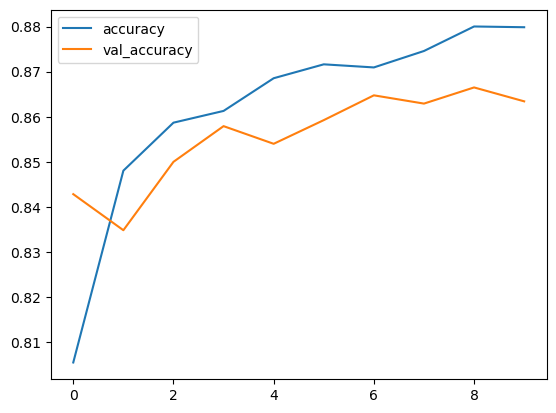

313/313 [==============================] - 1s 3ms/step - loss: 0.4284 - accuracy: 0.8565

Test Confusion Maxtrix: 
313/313 [==============================] - 0s 1ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,773,10,23,74,2,2,107,0,9,0
1,1,973,1,20,3,0,1,0,1,0
2,20,11,679,23,168,1,96,0,2,0
3,17,26,9,891,25,2,26,0,4,0
4,1,4,53,44,757,2,133,0,6,0
5,1,0,0,1,0,937,1,39,2,19
6,121,10,69,59,52,1,677,0,11,0
7,0,0,0,0,0,14,0,970,0,16
8,3,0,1,4,5,2,11,7,967,0


In [40]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'categorical_crossentropy'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 10
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','Fashion_MNIST_MLP.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION)(inputs)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(np.argmax(Y_test, axis=1), np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

## CNN

<center><img src='Image/Expert/CNN_Example.webp' width='900'></center>

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0
X_train: (60000, 28, 28, 1) Y_train: (60000, 10)
X_test: (10000, 28, 28, 1) Y_test: (10000, 10)
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 128)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        73792     
                 

Training:   0%|                                                                                0/10 ETA: ?s,  …

Epoch 1/10
750/750 [==============================] - 6s 7ms/step - loss: 0.6892 - accuracy: 0.7470 - val_loss: 0.4085 - val_accuracy: 0.8577
Epoch 2/10
750/750 [==============================] - 5s 7ms/step - loss: 0.5135 - accuracy: 0.8085 - val_loss: 0.3629 - val_accuracy: 0.8711
Epoch 3/10
750/750 [==============================] - 5s 7ms/step - loss: 0.4917 - accuracy: 0.8189 - val_loss: 0.3714 - val_accuracy: 0.8633
Epoch 4/10
750/750 [==============================] - 5s 7ms/step - loss: 0.4777 - accuracy: 0.8232 - val_loss: 0.3422 - val_accuracy: 0.8724
Epoch 5/10
750/750 [==============================] - 5s 6ms/step - loss: 0.4681 - accuracy: 0.8247 - val_loss: 0.3384 - val_accuracy: 0.8758
Epoch 6/10
750/750 [==============================] - 5s 7ms/step - loss: 0.4643 - accuracy: 0.8280 - val_loss: 0.3506 - val_accuracy: 0.8650
Epoch 7/10
750/750 [==============================] - 5s 7ms/step - loss: 0.4570 - accuracy: 0.8294 - val_loss: 0.3324 - val_accuracy: 0.8743
Epoch 

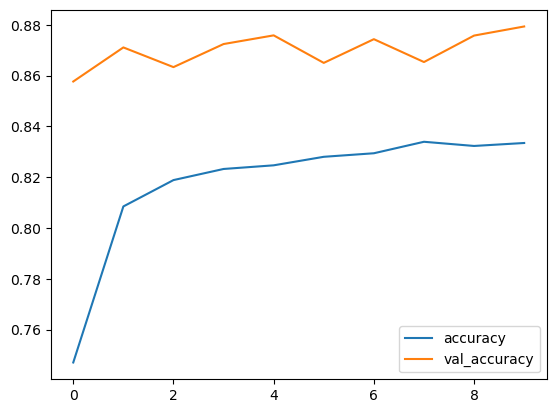

313/313 [==============================] - 1s 3ms/step - loss: 0.3463 - accuracy: 0.8699

Test Confusion Maxtrix: 
313/313 [==============================] - 1s 2ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,848,0,45,31,9,1,64,1,1,0
1,2,976,6,11,4,0,1,0,0,0
2,9,1,780,6,165,0,39,0,0,0
3,22,4,18,910,19,0,27,0,0,0
4,0,1,70,39,820,0,70,0,0,0
5,0,0,0,0,0,951,0,36,1,12
6,201,2,135,30,91,0,537,0,4,0
7,0,0,0,0,0,0,0,986,0,14
8,2,0,5,4,13,1,12,3,959,1


In [41]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'categorical_crossentropy'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 10
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','Fashion_MNIST_CNN.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(-1, X_test.shape[1], X_train.shape[2], 1)
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))   
hiddens = Conv2D(128, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(inputs)
hiddens = MaxPooling2D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Conv2D(64, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(hiddens)
hiddens = MaxPooling2D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Flatten()(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION)(hiddens)  
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(np.argmax(Y_test, axis=1), np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

목표값: 


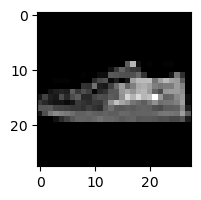

1/1 [==============================] - 0s 67ms/step
예측값:  Sneaker


In [42]:
# 베스트 모델 로딩
model = load_model(FILENAME)

# 임의 데이터를 예측하고 정답과 비교하기
idx_rand = np.random.randint(0, X_test.shape[0])
print('목표값: ')
plt.figure(figsize=(2,2))
plt.imshow(X_test[idx_rand], cmap='gray')
plt.show()
Y_label_list = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
print('예측값: ', Y_label_list[np.argmax(model.predict(X_test[idx_rand][np.newaxis,:]))])

## ResNet50

<center><img src='Image/Expert/CNN_ResNet.PNG' width='1000'>(Deep Residual Learning for Image Recognition)</center>

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0
X_train: (60000, 28, 28, 1) Y_train: (60000, 10)
X_test: (10000, 28, 28, 1) Y_test: (10000, 10)
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 34, 34, 1)    0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 14, 14, 64)   3200        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (Batch

                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 7, 7, 64)     36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 7, 7, 64)    256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 7, 7, 64)    0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 7, 7, 256)    16640       ['conv2_block3_2_relu[0][0]']    
          

                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 4, 4, 128)    147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 4, 4, 128)   512         ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 4, 4, 128)   0           ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 4, 4, 512)    66048       ['conv3_block3_2_relu[0][0]']    
          

                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 2, 2, 256)    590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 2, 2, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 2, 2, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 2, 2, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
          

                                                                                                  
 conv4_block5_2_relu (Activatio  (None, 2, 2, 256)   0           ['conv4_block5_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 2, 2, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 2, 2, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 2, 2, 1024)   0           ['conv4_block4_out[0][0]',       
          

                                                                                                  
 conv5_block2_2_relu (Activatio  (None, 1, 1, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 1, 1, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 1, 1, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 1, 1, 2048)   0           ['conv5_block1_out[0][0]',       
          

Training:   0%|                                                                                0/10 ETA: ?s,  …

Epoch 1/10
750/750 [==============================] - 41s 46ms/step - loss: 1.8349 - accuracy: 0.5358 - val_loss: 0.6845 - val_accuracy: 0.7455
Epoch 2/10
750/750 [==============================] - 32s 43ms/step - loss: 0.6934 - accuracy: 0.7538 - val_loss: 0.5270 - val_accuracy: 0.8063
Epoch 3/10
750/750 [==============================] - 30s 40ms/step - loss: 0.4745 - accuracy: 0.8262 - val_loss: 0.5523 - val_accuracy: 0.7958
Epoch 4/10
750/750 [==============================] - 28s 38ms/step - loss: 0.4124 - accuracy: 0.8516 - val_loss: 0.4396 - val_accuracy: 0.8476
Epoch 5/10
750/750 [==============================] - 28s 37ms/step - loss: 0.3846 - accuracy: 0.8615 - val_loss: 0.3951 - val_accuracy: 0.8543
Epoch 6/10
750/750 [==============================] - 29s 38ms/step - loss: 0.3594 - accuracy: 0.8671 - val_loss: 0.4513 - val_accuracy: 0.8344
Epoch 7/10
750/750 [==============================] - 32s 43ms/step - loss: 0.3259 - accuracy: 0.8799 - val_loss: 0.3313 - val_accuracy:

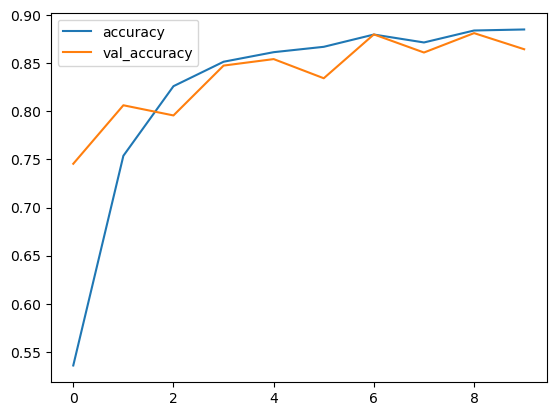

313/313 [==============================] - 4s 12ms/step - loss: 0.3915 - accuracy: 0.8580

Test Confusion Maxtrix: 
313/313 [==============================] - 4s 10ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,688,12,18,72,11,1,196,0,2,0
1,0,986,0,12,2,0,0,0,0,0
2,8,2,591,23,286,0,90,0,0,0
3,6,7,3,900,61,0,21,0,1,1
4,0,2,10,15,913,0,59,0,1,0
5,0,0,0,1,0,944,0,44,0,11
6,69,6,41,62,121,0,697,0,4,0
7,0,0,0,0,0,6,0,987,0,7
8,0,5,6,2,16,1,11,10,949,0


In [43]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'categorical_crossentropy'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 10
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','Fashion_MNIST_ResNet50.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(-1, X_test.shape[1], X_train.shape[2], 1)
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))   
model = ResNet50(input_tensor=inputs, pooling='max', include_top=True, 
                 weights=None, classes=Y_train.shape[1])
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(np.argmax(Y_test, axis=1), np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

목표값: 


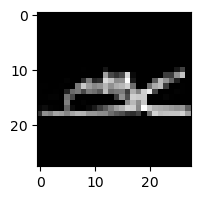

1/1 [==============================] - 1s 1s/step
예측값:  Sandal


In [44]:
# 베스트 모델 로딩
model = load_model(FILENAME)

# 임의 데이터를 예측하고 정답과 비교하기
idx_rand = np.random.randint(0, X_test.shape[0])
print('목표값: ')
plt.figure(figsize=(2,2))
plt.imshow(X_test[idx_rand], cmap='gray')
plt.show()
Y_label_list = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
print('예측값: ', Y_label_list[np.argmax(model.predict(X_test[idx_rand][np.newaxis,:]))])

# **Problem:** 컬러사물이미지 분류

## Data Preprocessing

In [45]:
# Train, Test 로딩
mnist = keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [46]:
# 데이터의 갯수와 크기 확인
print('---------------train----------------')
print('X: ', X_train.shape, X_train.min(), X_train.max())
print('Y: ', Y_train.shape)
print('----------------test----------------')
print('X: ', X_test.shape, X_test.min(), X_test.max())
print('Y: ', Y_test.shape)

---------------train----------------
X:  (50000, 32, 32, 3) 0 255
Y:  (50000, 1)
----------------test----------------
X:  (10000, 32, 32, 3) 0 255
Y:  (10000, 1)


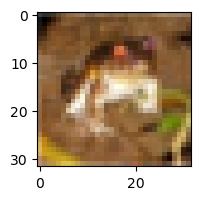

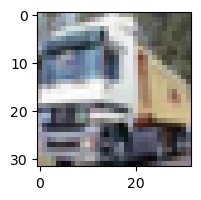

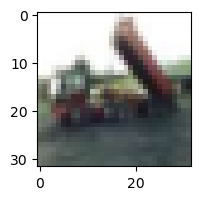

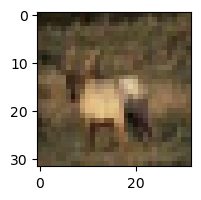

Label of train:  ['Frog', 'Truck', 'Truck', 'Deer']


In [47]:
# 샘플 데이터 시각화
# 0에서 255 사이의 값을 가진 데이터 시각화
for i in range(4):
    plt.figure(figsize=(2,2))
    plt.imshow(X_train[i])
    plt.show()

Y_label_list = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print('Label of train: ', [Y_label_list[num] for num in Y_train.flatten()[:4]])

## MLP

<center><img src='Image/Expert/DL_MLP_Custom.PNG' width='500'></center>

normalized X:  (50000, 32, 32, 3) 0.0 1.0
normalized X:  (10000, 32, 32, 3) 0.0 1.0
X_train: (50000, 3072) Y_train: (50000, 10)
X_test: (10000, 3072) Y_test: (10000, 10)
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_14 (Dense)            (None, 256)               786688    
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dense_16 (Dense)            (None, 10)                1290      
                                                                 
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
625/

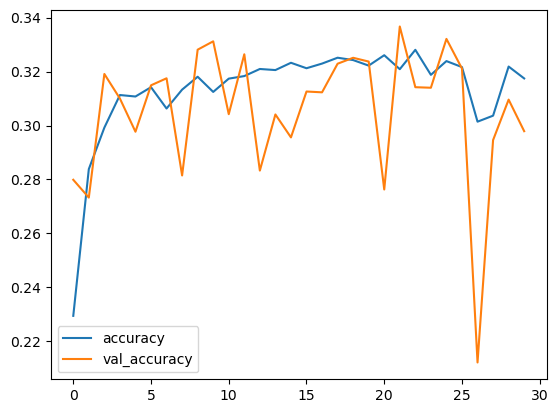

313/313 [==============================] - 1s 3ms/step - loss: 1.8657 - accuracy: 0.3046

Test Confusion Maxtrix: 
313/313 [==============================] - 1s 2ms/step


Pred,0,1,2,3,5,6,7,8,9
True,,,,,,,,,
0,111,36,56,11,16,29,84,521,136
1,6,389,13,22,30,37,56,112,335
2,17,51,83,12,87,229,303,147,71
3,2,88,61,59,198,210,177,95,110
4,7,26,45,22,77,292,384,83,64
5,3,58,51,54,225,191,212,120,86
6,0,70,18,43,136,496,154,21,62
7,8,23,61,25,35,65,570,67,146
8,30,82,25,28,32,8,15,578,202


In [48]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'categorical_crossentropy'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 30
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','ColorObject_MNIST_MLP.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION)(inputs)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(np.argmax(Y_test, axis=1), np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

## CNN

<center><img src='Image/Expert/CNN_Example.webp' width='900'></center>

normalized X:  (50000, 32, 32, 3) 0.0 1.0
normalized X:  (10000, 32, 32, 3) 0.0 1.0
X_train: (50000, 32, 32, 3) Y_train: (50000, 10)
X_test: (10000, 32, 32, 3) Y_test: (10000, 10)
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 128)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        73792     
           

Training:   0%|                                                                                0/30 ETA: ?s,  …

Epoch 1/30
625/625 [==============================] - 6s 8ms/step - loss: 2.0640 - accuracy: 0.2378 - val_loss: 1.9422 - val_accuracy: 0.2723
Epoch 2/30
625/625 [==============================] - 4s 7ms/step - loss: 1.9892 - accuracy: 0.2604 - val_loss: 1.8921 - val_accuracy: 0.2992
Epoch 3/30
625/625 [==============================] - 4s 7ms/step - loss: 1.9686 - accuracy: 0.2704 - val_loss: 2.0158 - val_accuracy: 0.2636
Epoch 4/30
625/625 [==============================] - 5s 7ms/step - loss: 1.9602 - accuracy: 0.2722 - val_loss: 1.8984 - val_accuracy: 0.3015
Epoch 5/30
625/625 [==============================] - 5s 8ms/step - loss: 1.9397 - accuracy: 0.2764 - val_loss: 1.8389 - val_accuracy: 0.3080
Epoch 6/30
625/625 [==============================] - 5s 8ms/step - loss: 1.9054 - accuracy: 0.2859 - val_loss: 1.8837 - val_accuracy: 0.3087
Epoch 7/30
625/625 [==============================] - 5s 8ms/step - loss: 1.8875 - accuracy: 0.2880 - val_loss: 1.8138 - val_accuracy: 0.3087
Epoch 

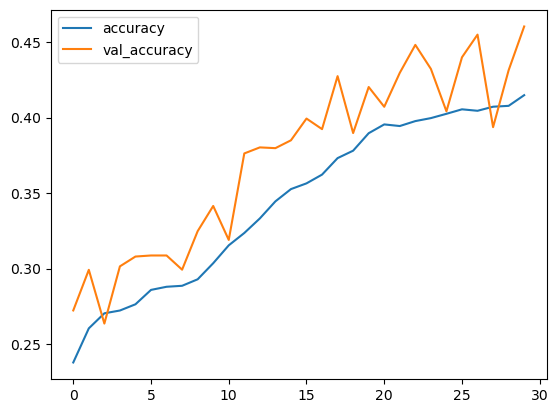

313/313 [==============================] - 1s 4ms/step - loss: 1.4827 - accuracy: 0.4739

Test Confusion Maxtrix: 
313/313 [==============================] - 1s 2ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,318,20,148,63,27,16,25,27,291,65
1,5,514,10,63,7,19,81,18,61,222
2,35,3,331,101,234,86,119,44,34,13
3,7,6,134,312,63,193,203,43,14,25
4,19,3,133,87,425,37,198,83,9,6
5,3,2,114,177,78,390,140,75,15,6
6,4,2,41,84,126,38,669,21,4,11
7,7,1,41,97,97,142,100,492,4,19
8,47,61,39,57,8,15,8,5,705,55


In [49]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'categorical_crossentropy'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 30
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','ColorObject_MNIST_CNN.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))   
hiddens = Conv2D(128, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(inputs)
hiddens = MaxPooling2D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Conv2D(64, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(hiddens)
hiddens = MaxPooling2D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Flatten()(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION)(hiddens)  
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(np.argmax(Y_test, axis=1), np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

목표값: 


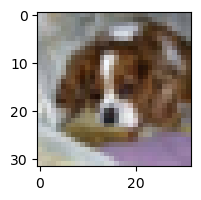

1/1 [==============================] - 0s 115ms/step
예측값:  Dog


In [50]:
# 베스트 모델 로딩
model = load_model(FILENAME)

# 임의 데이터를 예측하고 정답과 비교하기
idx_rand = np.random.randint(0, X_test.shape[0])
print('목표값: ')
plt.figure(figsize=(2,2))
plt.imshow(X_test[idx_rand], cmap='gray')
plt.show()
Y_label_list = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print('예측값: ', Y_label_list[np.argmax(model.predict(X_test[idx_rand][np.newaxis,:]))])

## ResNet50

<center><img src='Image/Expert/CNN_ResNet.PNG' width='1000'>(Deep Residual Learning for Image Recognition)</center>

normalized X:  (50000, 32, 32, 3) 0.0 1.0
normalized X:  (10000, 32, 32, 3) 0.0 1.0
X_train: (50000, 32, 32, 3) Y_train: (50000, 10)
X_test: (10000, 32, 32, 3) Y_test: (10000, 10)
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_10[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn 

                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 8, 8, 64)     36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 8, 8, 64)    256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 8, 8, 64)    0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 8, 8, 256)    16640       ['conv2_block3_2_relu[0][0]']    
          

                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 4, 4, 128)    147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 4, 4, 128)   512         ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 4, 4, 128)   0           ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 4, 4, 512)    66048       ['conv3_block3_2_relu[0][0]']    
          

                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 2, 2, 256)    590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 2, 2, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 2, 2, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 2, 2, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
          

                                                                                                  
 conv4_block5_2_relu (Activatio  (None, 2, 2, 256)   0           ['conv4_block5_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 2, 2, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 2, 2, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 2, 2, 1024)   0           ['conv4_block4_out[0][0]',       
          

                                                                                                  
 conv5_block2_2_relu (Activatio  (None, 1, 1, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 1, 1, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 1, 1, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 1, 1, 2048)   0           ['conv5_block1_out[0][0]',       
          

Training:   0%|                                                                                0/30 ETA: ?s,  …

Epoch 1/30
625/625 [==============================] - 33s 44ms/step - loss: 2.8086 - accuracy: 0.2323 - val_loss: 4.1897 - val_accuracy: 0.1591
Epoch 2/30
625/625 [==============================] - 28s 45ms/step - loss: 1.6335 - accuracy: 0.3909 - val_loss: 2.1310 - val_accuracy: 0.3302
Epoch 3/30
625/625 [==============================] - 25s 40ms/step - loss: 1.4179 - accuracy: 0.4832 - val_loss: 1.4683 - val_accuracy: 0.4756
Epoch 4/30
625/625 [==============================] - 24s 39ms/step - loss: 1.2811 - accuracy: 0.5347 - val_loss: 3.1841 - val_accuracy: 0.2790
Epoch 5/30
625/625 [==============================] - 26s 41ms/step - loss: 1.1937 - accuracy: 0.5732 - val_loss: 1.2986 - val_accuracy: 0.5513
Epoch 6/30
625/625 [==============================] - 28s 44ms/step - loss: 1.0347 - accuracy: 0.6340 - val_loss: 1.1849 - val_accuracy: 0.5855
Epoch 7/30
625/625 [==============================] - 30s 47ms/step - loss: 0.9391 - accuracy: 0.6727 - val_loss: 1.0766 - val_accuracy:

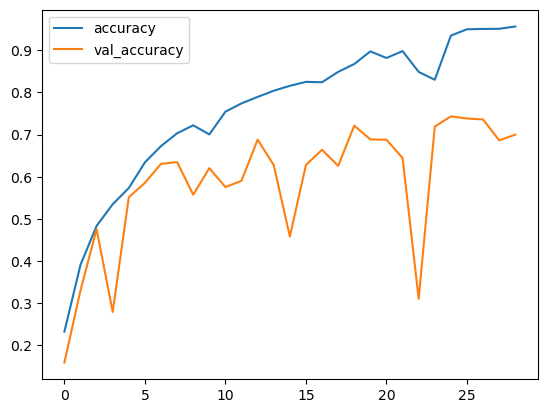

313/313 [==============================] - 4s 11ms/step - loss: 1.4029 - accuracy: 0.6986

Test Confusion Maxtrix: 
313/313 [==============================] - 4s 9ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,691,51,24,20,6,23,12,8,57,108
1,1,888,2,1,0,5,3,1,8,91
2,59,22,575,74,27,140,48,24,15,16
3,18,23,54,401,15,325,64,34,16,50
4,24,13,96,62,489,134,76,70,18,18
5,13,10,23,92,9,784,20,26,6,17
6,4,15,30,49,12,98,766,3,9,14
7,11,15,13,19,13,119,11,730,0,69
8,39,59,9,7,4,17,9,0,816,40


In [51]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'categorical_crossentropy'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 30
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','ColorObject_MNIST_ResNet50.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))   
model = ResNet50(input_tensor=inputs, pooling='max', include_top=True, 
                 weights=None, classes=Y_train.shape[1])
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(np.argmax(Y_test, axis=1), np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

목표값: 


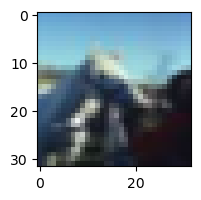

1/1 [==============================] - 1s 1s/step
예측값:  Ship


In [52]:
# 베스트 모델 로딩
model = load_model(FILENAME)

# 임의 데이터를 예측하고 정답과 비교하기
idx_rand = np.random.randint(0, X_test.shape[0])
print('목표값: ')
plt.figure(figsize=(2,2))
plt.imshow(X_test[idx_rand], cmap='gray')
plt.show()
Y_label_list = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print('예측값: ', Y_label_list[np.argmax(model.predict(X_test[idx_rand][np.newaxis,:]))])

# **Problem:** 보스턴 집값 예측

|   **변수**  |              **설명**              |
|:-------:|:------------------------------:|
|  **Price**  |            주택 가격           |
|   **CRIM**  |        1인당 범죄 발생률       |
|    **ZN**   |       주택용 토지의 비율       |
|  **INDUS**  |      비소매 상업지역 비율      |
|   **CHAS**  |    찰스강 인접 여부(인접=1)    |
|   **NOX**   |         일산화질소 농도        |
|    **RM**   |            방의 개수           |
|   **AGE**   | 1940년 이전에 건축된 주택 비율 |
|   **DIS**   |     주요 5대 회사와의 거리     |
|   **RAD**   |         고속도로 접근성        |
|   **TAX**   |             재산세             |
| **PTRATIO** |       교사와 학생의 비율       |
|    **B**    |         흑인 거주 비율         |
|  **LSTAT**  |          저소득층 비율         |

## MLP

<center><img src='Image/Expert/DL_MLP_Custom.PNG' width='500'></center>

(404, 13) (404, 1)
(102, 13) (102, 1)
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 18)]              0         
                                                                 
 dense_19 (Dense)            (None, 256)               4864      
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               32896     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)

Training:   0%|                                                                               0/500 ETA: ?s,  …

Epoch 24: early stopping


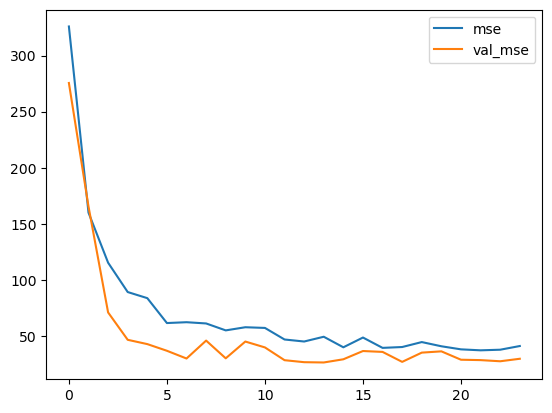

4/4 [==============================] - 0s 2ms/step


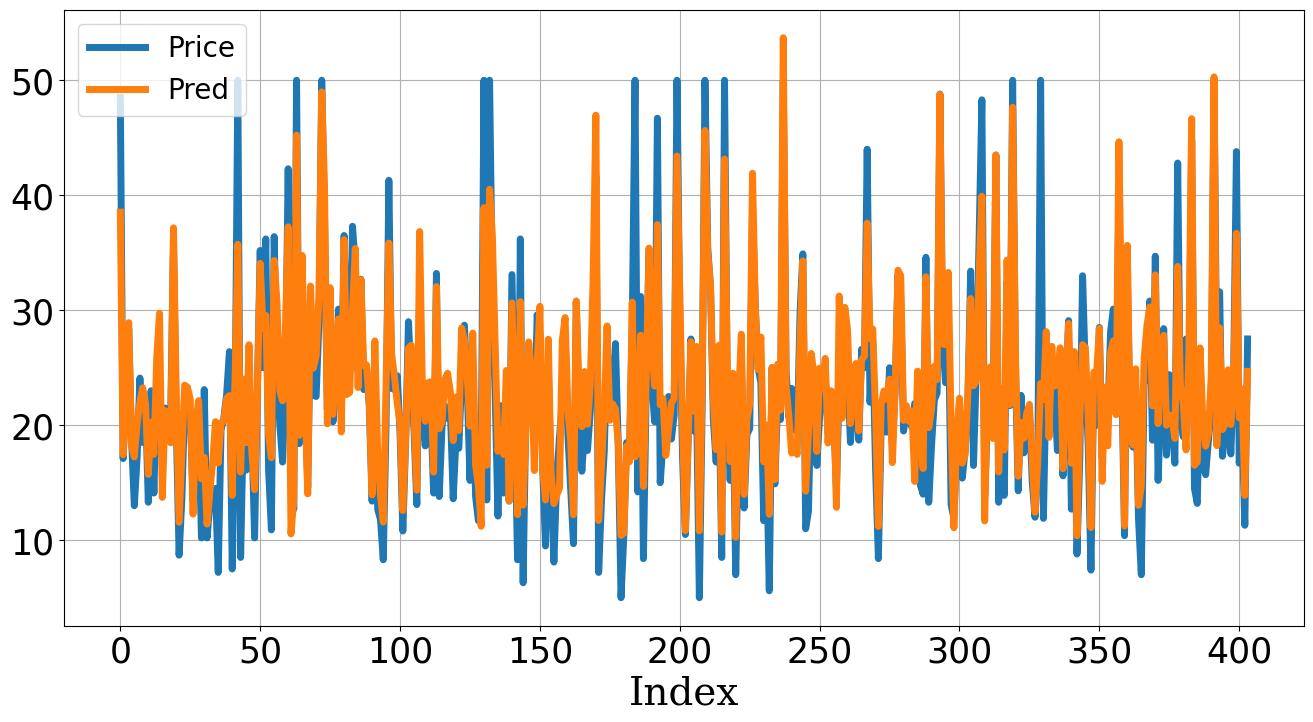

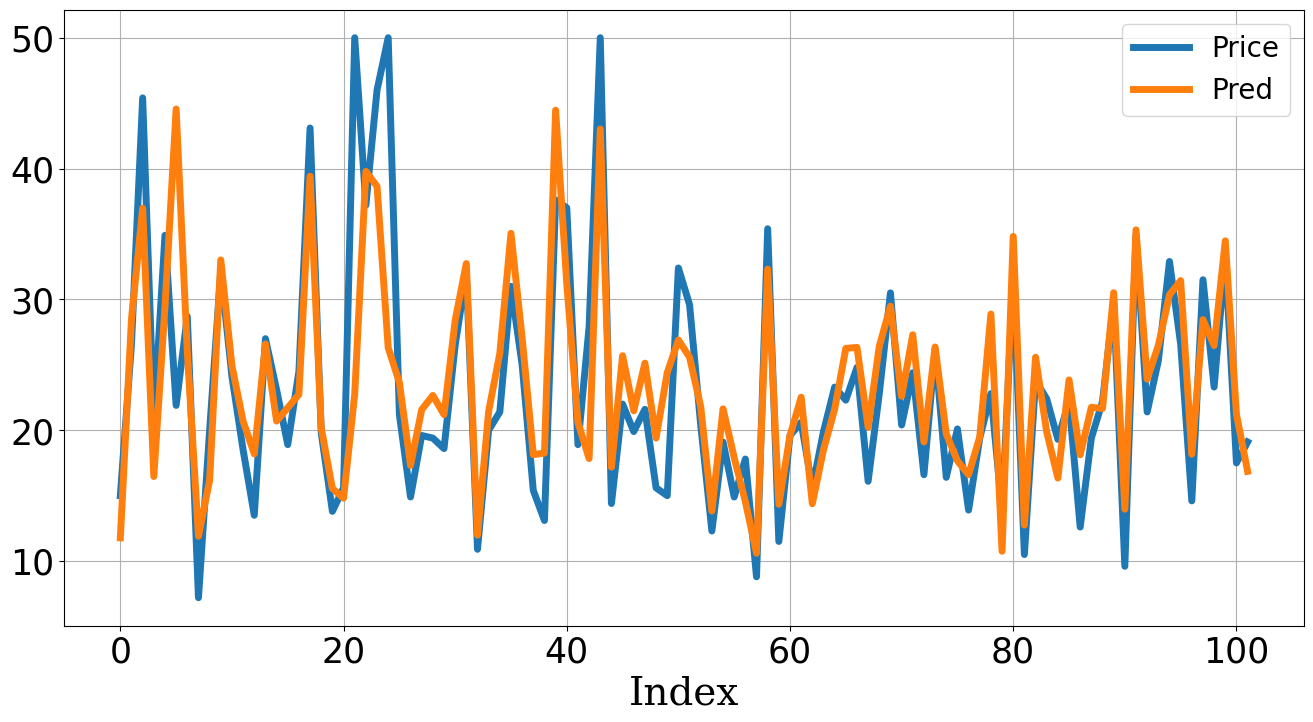

,MAE,MSE,MAPE
Train,2.85,16.43,0.16
Test,3.57,29.75,0.16


In [53]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'linear'
REGULARIZER = regularizers.l2(0.01)
DROPOUT_RATIO = 0.25
LOSS = 'mse'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['mse']
BATCH_SIZE = 32
EPOCHS = 500
VERBOSE = 0
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','BostonHousing_MLP.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# 사용자 정의 함수
from module_regression import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# 네트워크 구축
inputs = Input(shape=(X_train_fes.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(inputs)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(64, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train_fes, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)

4/4 [==============================] - 0s 2ms/step


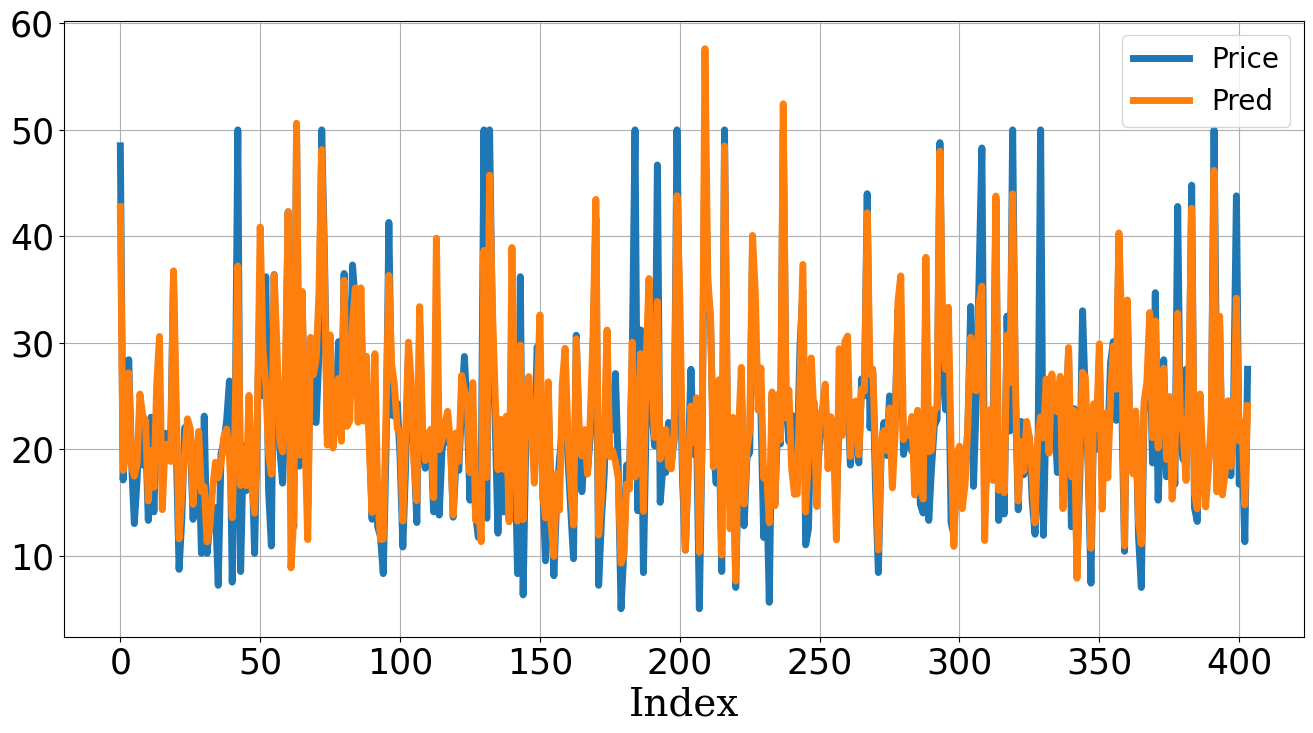

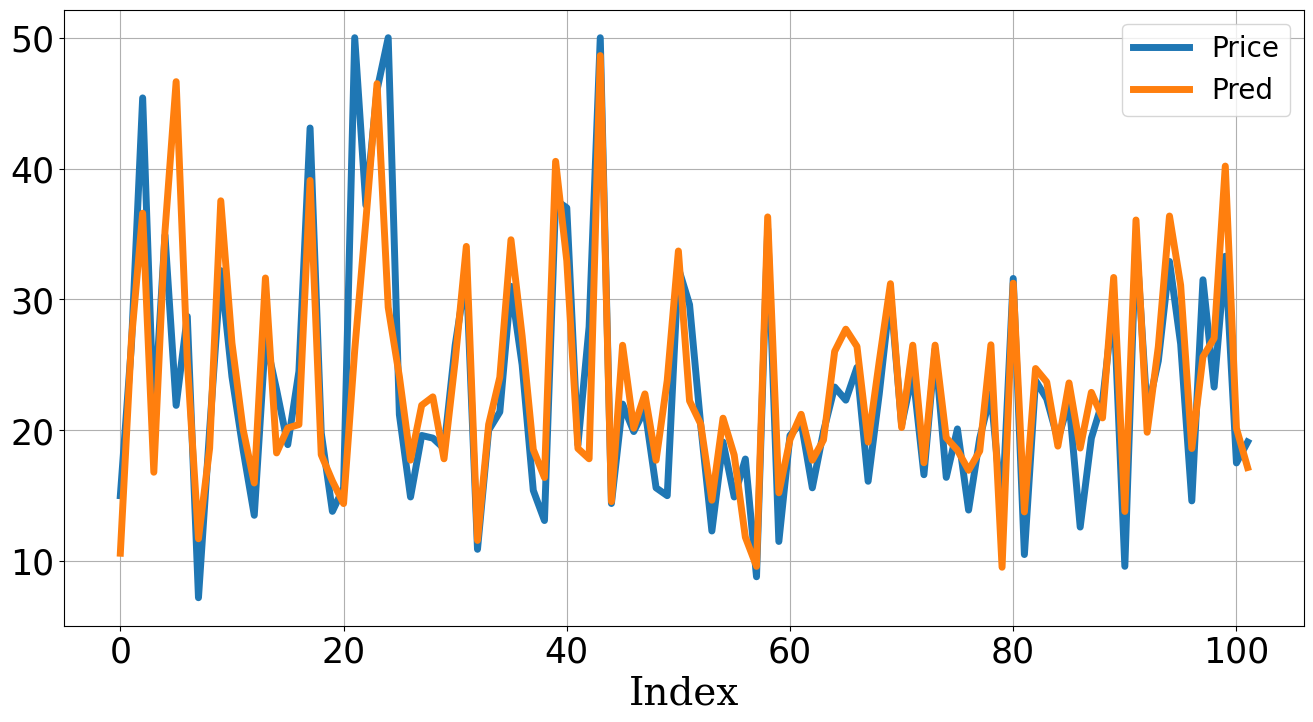

,MAE,MSE,MAPE
Train,2.81,16.71,0.15
Test,3.23,26.44,0.15


In [54]:
# 베스트 모델 로딩
model = load_model(FILENAME)

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)

## CNN

<center><img src='Image/Expert/CNN_Example.webp' width='900'></center>

---

<center><img src='Image/Expert/Conv1D2D3D.PNG' width='800'>(https://i.stack.imgur.com/)</center>

(404, 13) (404, 1)
(102, 13) (102, 1)
X_train: (404, 18, 1) Y_train: (404, 1)
X_test: (102, 18, 1) Y_test: (102, 1)
Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 18, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 18, 128)           512       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9, 128)           0         
 )                                                               
                                                                 
 dropout_13 (Dropout)        (None, 9, 128)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 9, 64)             24640     
                                                                 
 max_pool

Training:   0%|                                                                               0/500 ETA: ?s,  …

Epoch 60: early stopping


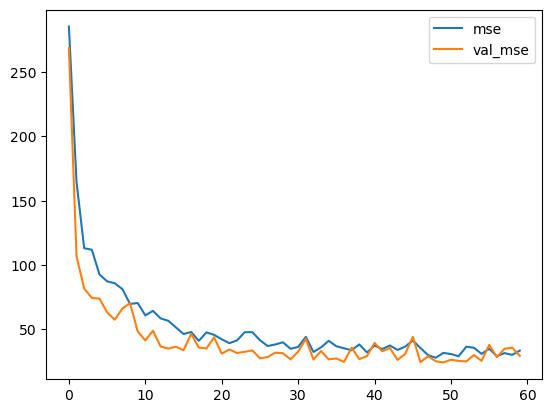

4/4 [==============================] - 0s 3ms/step


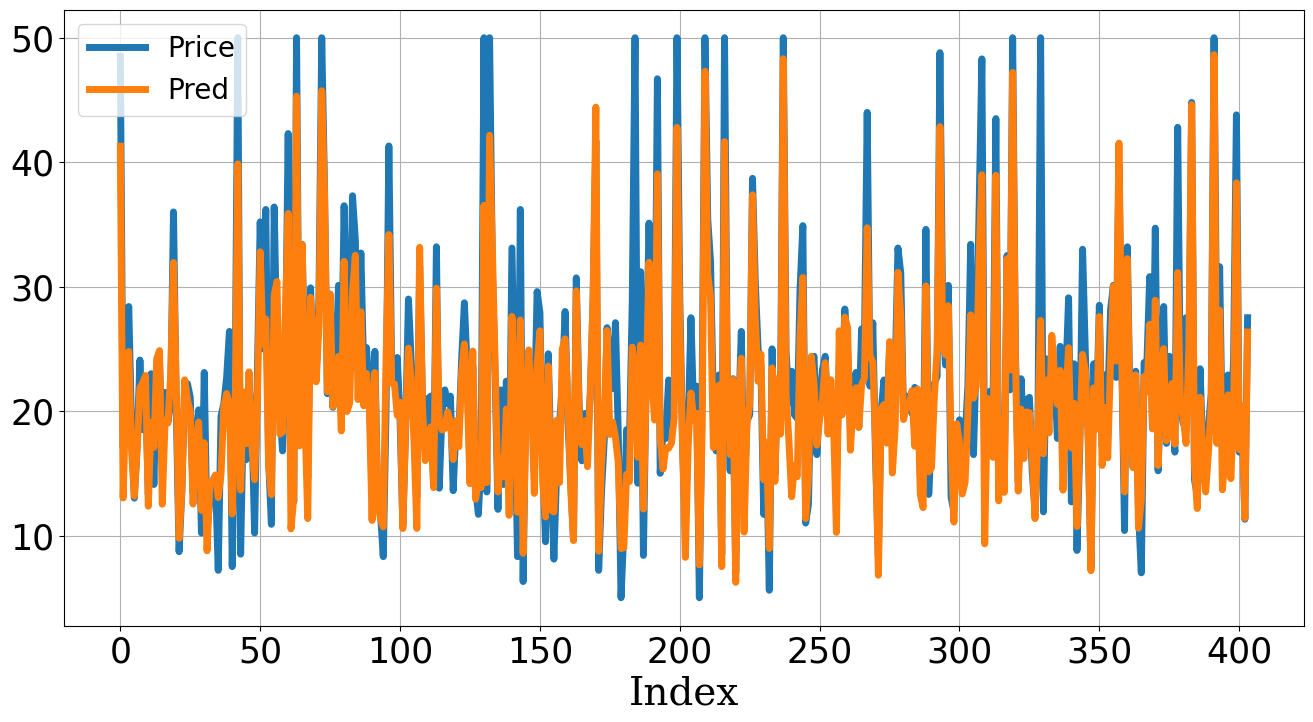

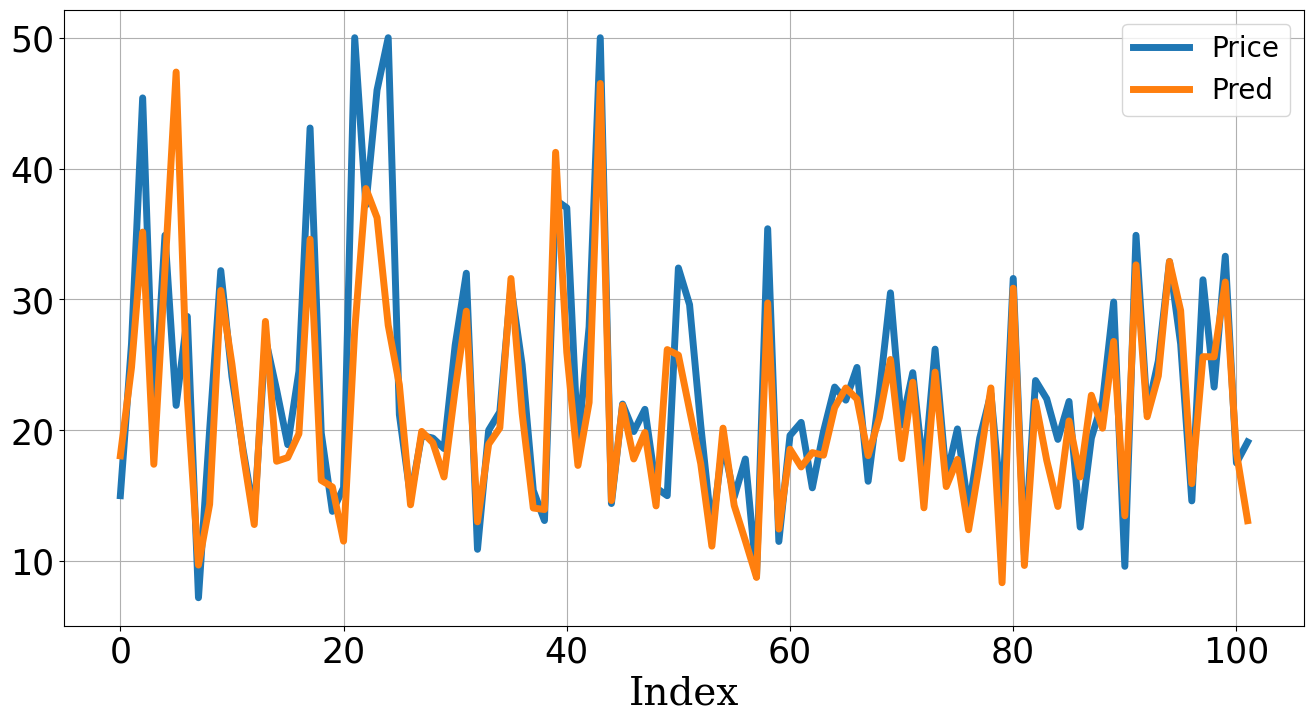

,MAE,MSE,MAPE
Train,2.57,13.63,0.12
Test,3.40,29.40,0.14


In [55]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = 3
STRIDE = 1
POOL_SIZE = 2
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'linear'
REGULARIZER = regularizers.l2(0.01)
DROPOUT_RATIO = 0.25
LOSS = 'mse'
LEARNING_RATE = 0.01
OPTIMIZER = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
METRICS = ['mse']
BATCH_SIZE = 32
EPOCHS = 500
VERBOSE = 0
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','BostonHousing_CNN.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# 사용자 정의 함수
from module_regression import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Reshape
X_train = X_train_fes.values.reshape(-1, X_train_fes.shape[1], 1)
X_test = X_test_fes.values.reshape(-1, X_test_fes.shape[1], 1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))   
hiddens = Conv1D(128, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(inputs)
hiddens = MaxPooling1D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Conv1D(64, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(hiddens)
hiddens = MaxPooling1D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Flatten()(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION)(hiddens)  
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)

4/4 [==============================] - 0s 2ms/step


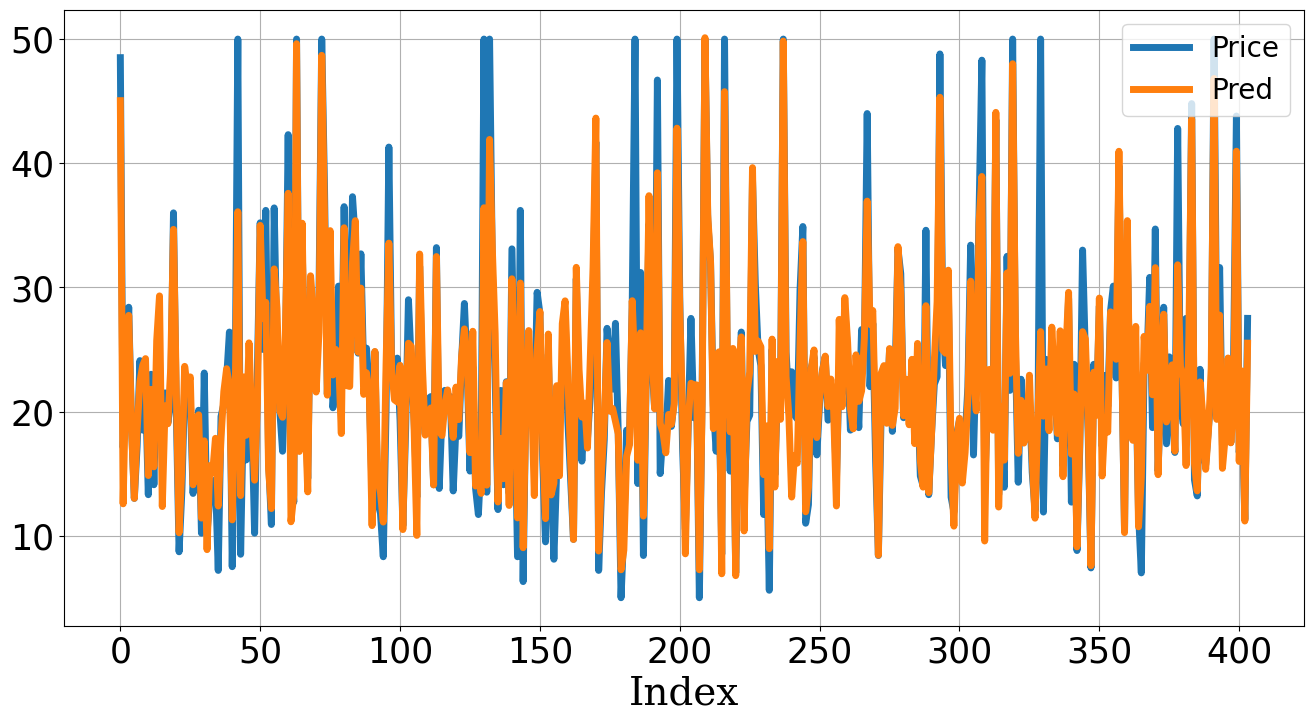

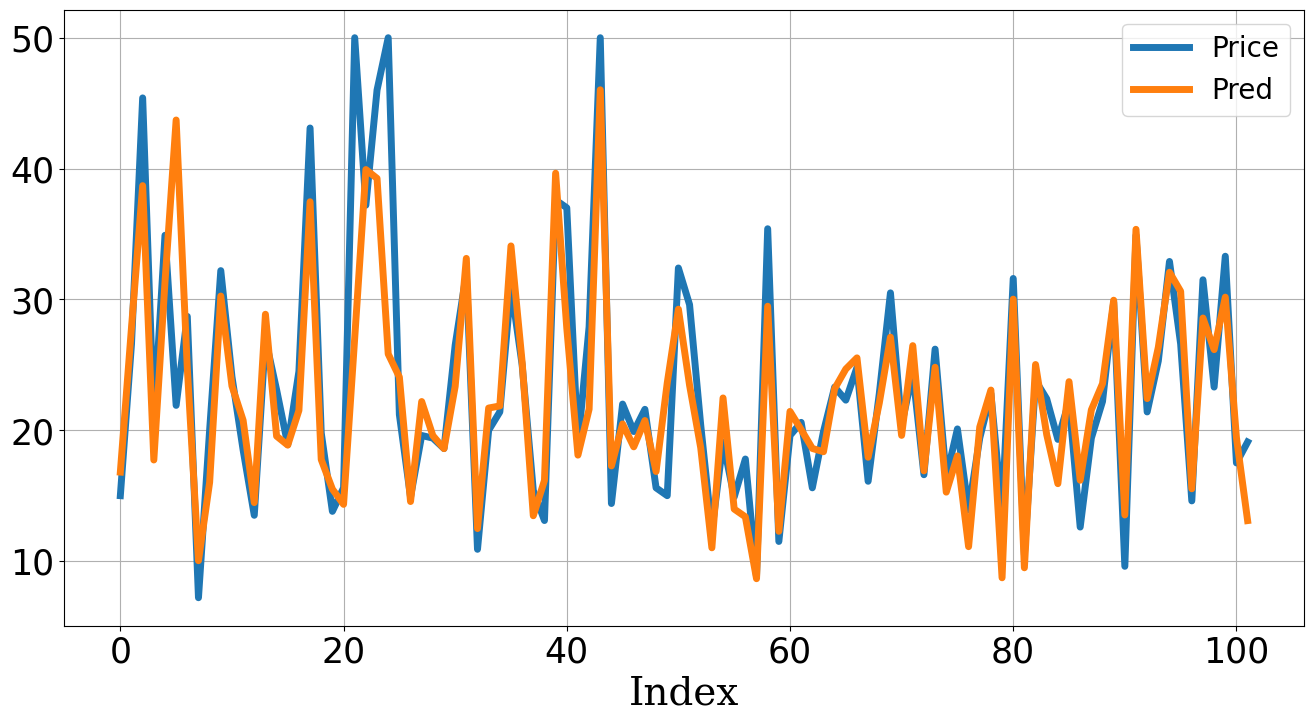

,MAE,MSE,MAPE
Train,2.36,12.48,0.12
Test,2.94,24.16,0.13


In [56]:
# 베스트 모델 로딩
model = load_model(FILENAME)

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)